In [1]:
from fastai.vision.gan import *
from fastai.vision.all import *
from torch import optim
from tqdm import tqdm
from fastbook import *              
from glob import glob

In [2]:
path='data/train/images/'

In [3]:
bs = 128
size = 64

In [4]:
dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   item_tfms=Resize(size, method=ResizeMethod.Crop), 
                   batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])))

In [5]:
dls = dblock.dataloaders(path, path=path, bs=bs)

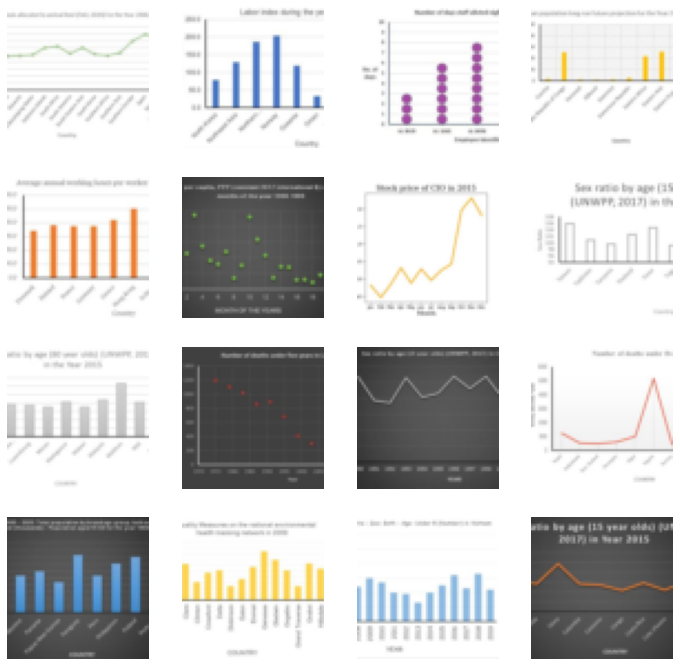

In [6]:
dls.show_batch(max_n=16)

In [7]:
from fastai.callback.all import *

In [8]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (64, n_channels=3, n_extra_layers=1, act_cls=partial(nn.LeakyReLU, negative_slope=0.2))

In [9]:
learn = GANLearner.wgan(dls, generator, critic, opt_func = RMSProp)

In [10]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False

In [11]:
learn.fit(160, 2e-4, wd=0.)

/usr/local/lib/python3.9/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/usr/local/lib/python3.9/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/usr/local/lib/python3.9/dist-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


epoch,train_loss,gen_loss,crit_loss,time
0,-1.134396,0.621420,-1.194997,01:37
1,-1.034824,0.605787,-1.175013,01:19
2,-0.884528,0.638082,-1.199503,01:20
3,-1.131592,0.670779,-1.240695,01:18
4,-0.856837,0.682334,-1.233602,01:19
5,-1.129124,0.643441,-1.234895,01:18
6,-0.756850,0.643784,-1.229772,01:18
7,-1.126499,0.659953,-1.256713,01:17
8,-0.679376,0.628550,-1.221630,01:21
9,-1.045310,0.663749,-1.197834,01:24


/usr/local/lib/python3.9/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [14]:
learn.save('graph_generator_model')

Path('data/train/images/models/graph_generator_model.pth')

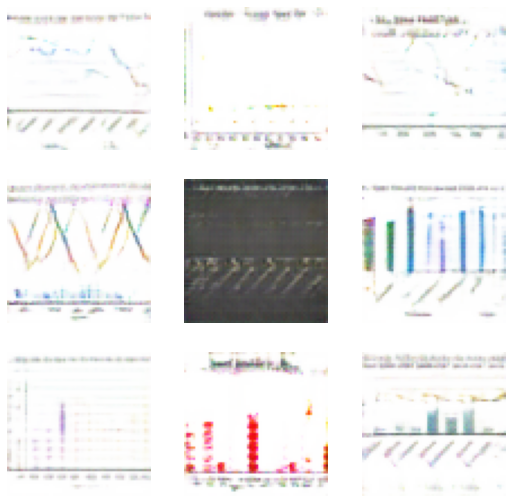

In [12]:
learn.show_results(max_n=9, ds_idx=0)

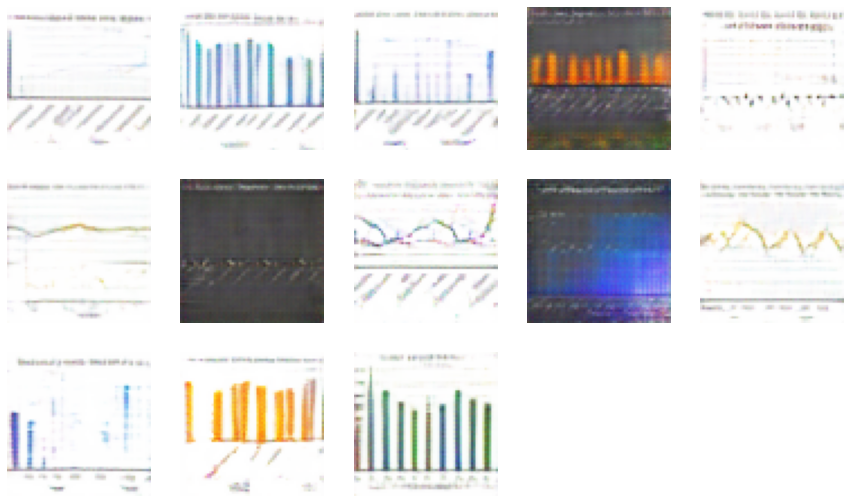

In [13]:
learn.gan_trainer.switch(gen_mode=True)
learn.show_results(max_n=13, ds_idx=0)